# Importing Libraries
**To build and evaluate a classification model using XGBClassifier, we need to import several libraries. Below are the libraries used in this notebook and their purposes:**

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)


# Library Overview
**pandas:**

import pandas as pd
Used for data manipulation and analysis. It provides data structures like DataFrames for handling and analyzing structured data.

**numpy:**

import numpy as np
Provides support for large arrays and matrices, along with a collection of mathematical functions to operate on these arrays.

**sklearn.model_selection:**

from sklearn.model_selection import train_test_split
Used for splitting the dataset into training and testing sets, which is crucial for evaluating model performance.

**sklearn.preprocessing:**

from sklearn.preprocessing import StandardScaler
Provides utilities for scaling and normalizing data, ensuring that the features are on a similar scale for better model performance.

**xgboost:**

from xgboost import XGBClassifier
A powerful gradient boosting algorithm that enhances the performance of classification models through ensemble learning.

**sklearn.metrics:**

from sklearn.metrics import accuracy_score, classification_report
Used for evaluating the model’s performance. accuracy_score provides the accuracy of the model, while classification_report offers a detailed performance summary including precision, recall, and F1-score.

**warnings:**

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
Suppresses FutureWarnings from Pandas to avoid clutter in the output. It's useful for maintaining cleaner output but should be used cautiously.

# Loading and Exploring the Data


**1. Load the Data**

We begin by loading the breast cancer dataset into a DataFrame:

In [2]:
# Load the data
Data = pd.read_csv('/kaggle/input/breast-cancer-wisconsin-data/data.csv')

**2. Display the First Few Rows**

To get an initial understanding of the dataset, we display the first few rows:

This step helps us see the structure and content of the data, including the column names and a snapshot of the entries.

In [3]:
# Display the first few rows of the dataset
print("Display the first few rows of the dataset: \n",Data.head(5))

Display the first few rows of the dataset: 
          id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_w

**3. Display Basic Information**

We use the info() method to get a summary of the dataset, including the number of non-null entries and data types of each column:

This information is useful to understand the dataset's structure and check if any columns contain missing values.

In [4]:
# Display basic information about the dataset
print("===>Display basic information about the dataset:\n",Data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

**4. Display Summary Statistics**

To get a sense of the distribution of numerical features, we use the describe() method:

In [5]:
# Display summary statistics
print("Display summary statistics: \n",Data.describe())

Display summary statistics: 
                  id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0

This method provides key statistics such as mean, standard deviation, and quartiles for each numerical feature.

**5. Check for Missing Values**

Finally, we check for any missing values in the dataset:

This step is crucial for identifying any columns that need data imputation or cleaning before proceeding with analysis or modeling.

In [6]:
# Check for missing values
print("missing values:\n",Data.isnull().sum())

missing values:
 id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_wors

# Data Preprocessing and Splitting
**1. Drop Unnecessary Columns**

We start by removing columns that are not useful for our analysis or model training. In this case, we drop the 'Unnamed: 32' column and the 'id' column:
The 'id' column is typically an identifier and does not contribute to the prediction, while 'Unnamed: 32' might be an empty or irrelevant column.

**2. Separate Features and Target Variable**

Next, we separate the features and the target variable:
X: Contains all columns except 'diagnosis', which are the features used for prediction.
y: Contains the 'diagnosis' column, which is our target variable.

**3. Convert Target Variable to Binary** 

We convert the categorical 'diagnosis' column to binary values for classification:
Malignant ('M') is converted to 1.
Benign ('B') is converted to 0.


In [7]:
Data = Data.drop(['Unnamed: 32', 'id'], axis = 1)

X = Data.drop('diagnosis', axis=1)  
y = Data['diagnosis']     

# Convert 'diagnosis' column to binary
y = y.replace({'M': 1, 'B': 0})

print("target: \n",y.head(10))

target: 
 0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    1
8    1
9    1
Name: diagnosis, dtype: int64


**4. Split the Data into Training and Testing Sets**

We split the dataset into training and testing sets to evaluate the performance of our model:
X_train and y_train: Training features and target variable.
X_test and y_test: Testing features and target variable.
test_size=0.3: 30% of the data is used for testing.
random_state=42: Ensures reproducibility by setting a seed for random number generation.

**5. Optionally Scale the Features**

Scaling the features helps improve the performance and convergence of many machine learning algorithms:

StandardScaler(): Standardizes features by removing the mean and scaling to unit variance.
fit_transform(): Fits the scaler on the training data and transforms it.
transform(): Transforms the test data using the fitted scaler.


In [8]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Model Training and Evaluation

**1. Initialize and Train the XGBoost Classifier**

We initialize the XGBClassifier and fit it to the training data:

In [9]:
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

XGBClassifier(): Initializes the XGBoost model for classification.

fit(): Trains the model on the training features (X_train) and target variable (y_train).

**Note on Hyperparameter Tuning**

To enhance the performance of the XGBClassifier, consider tuning various hyperparameters. The model's accuracy can often be improved by adjusting hyperparameters such as:

n_estimators: Number of boosting rounds. Increasing this can improve performance but may lead to overfitting.
learning_rate: Step size shrinkage used in the update to prevent overfitting. Lower values can improve accuracy but require more boosting rounds.
max_depth: Maximum depth of a tree. Higher values allow the model to capture more complex patterns but can lead to overfitting.
min_child_weight: Minimum sum of instance weight (hessian) needed in a child. It controls overfitting.
subsample: Fraction of samples used for fitting each individual base learner. Lower values help prevent overfitting.
colsample_bytree: Fraction of features used for each tree. Helps in reducing overfitting.
By carefully tuning these hyperparameters, you can achieve better accuracy and more robust model performance.



**2. Make Predictions**

predict(): Generates predictions for the test features (X_test).

After training the model, we use it to make predictions on the test data:

In [10]:
# Make predictions on the validation set
y_pred = model.predict(X_test)

**3. Evaluate the Model**

classification_report(): Provides a detailed report of the model’s performance, including precision, recall, F1-score, and support for each class.

We evaluate the performance of the XGBoost model by generating a classification report:

In [11]:
print("XGBoost Model Evaluation:")
print(classification_report(y_test, y_pred))

XGBoost Model Evaluation:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       108
           1       0.95      0.97      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



# Data Visualization

Visualizations help us understand the dataset and evaluate the model’s performance more intuitively. Here are some common visualizations used in classification tasks:

**1. Distribution of Target Classes**

Explanation:

Countplot: Shows the count of each class in the target variable.

Palette: Colors used for the bars.

Understanding the distribution of target classes helps us see if the dataset is imbalanced:

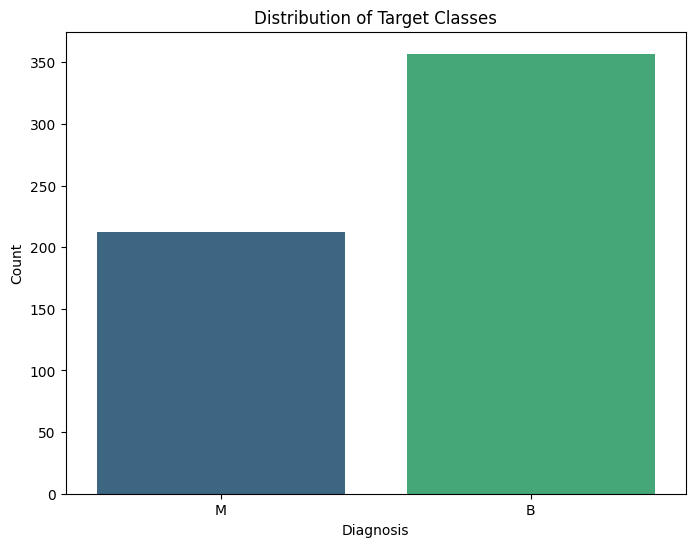

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
# Plot the distribution of the target variable
plt.figure(figsize=(8, 6))
sns.countplot(x='diagnosis', data=Data, palette='viridis')
plt.title('Distribution of Target Classes')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.show()


**2. Feature Importances**

XGBoost provides feature importance scores that can help us understand which features contribute most to the model’s predictions:

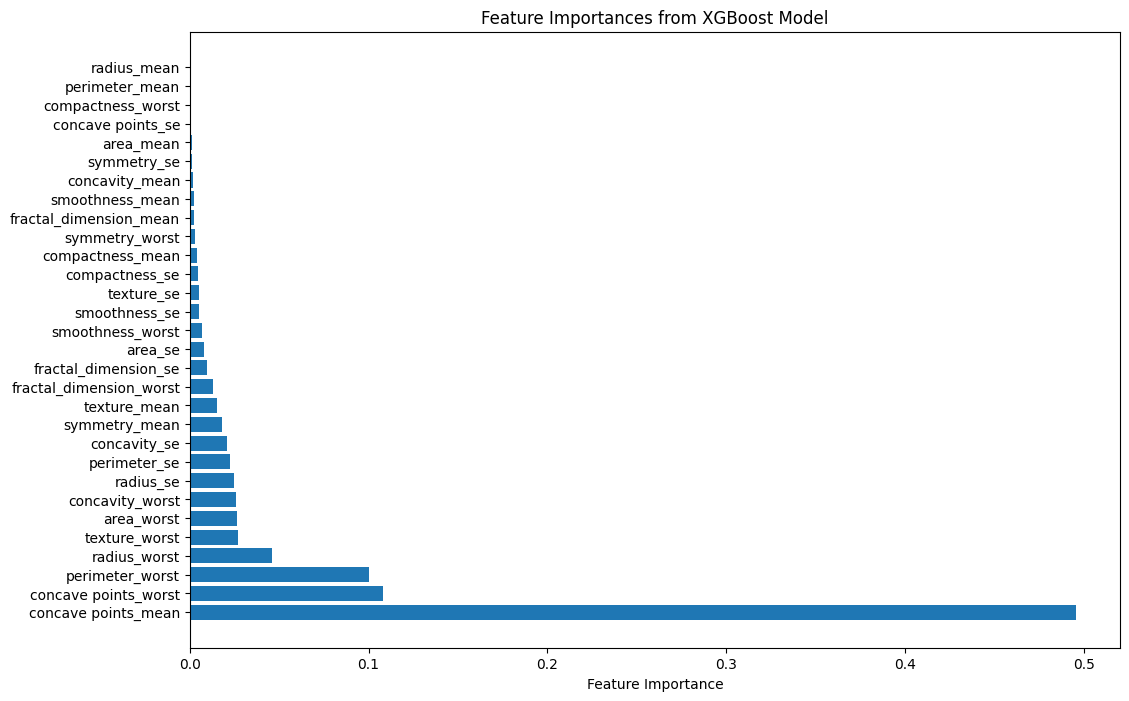

In [13]:
# Plot feature importances
plt.figure(figsize=(12, 8))
feature_importances = model.feature_importances_
features = X.columns
sorted_idx = np.argsort(feature_importances)[::-1]

plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), features[sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Feature Importances from XGBoost Model')
plt.show()


Explanation:

Feature Importances: Shows the importance of each feature according to the XGBoost model.

Barh Plot: Horizontal bar plot where the length of the bar represents feature importance.

**3. Confusion Matrix**

A confusion matrix helps us understand the performance of the model by showing the true vs. predicted classifications:

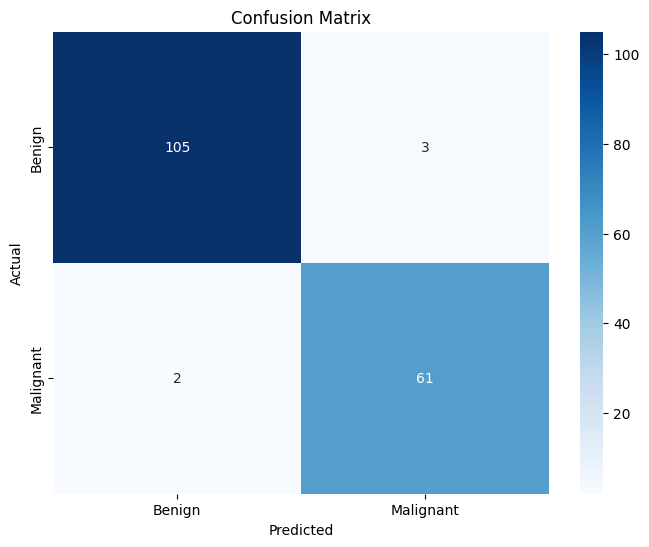

In [14]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Benign', 'Malignant'], 
            yticklabels=['Benign', 'Malignant'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Explanation:

Confusion Matrix: Shows the number of true positives, true negatives, false positives, and false negatives.

Heatmap: Visual representation of the confusion matrix with color gradients.

**4. ROC Curve**

The ROC curve illustrates the performance of a binary classification model by showing the trade-off between the true positive rate and false positive rate:

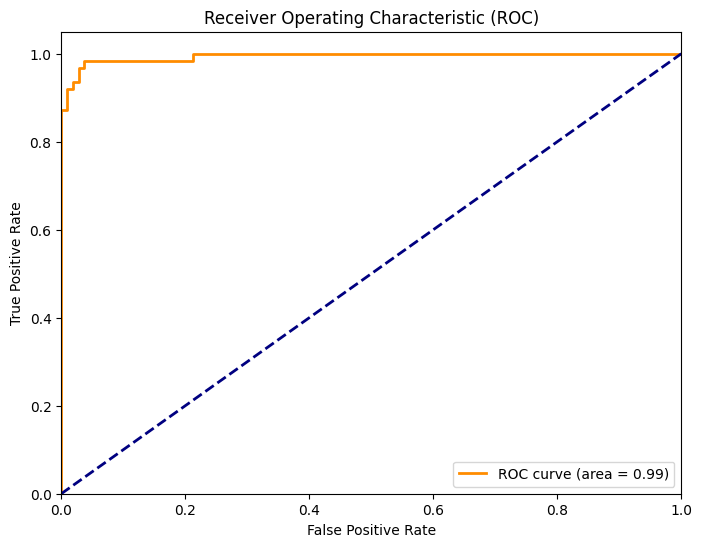

In [15]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()


Explanation:

ROC Curve: Displays the trade-off between sensitivity (true positive rate) and 1-specificity (false positive rate).

AUC (Area Under Curve): Represents the overall performance of the model. Higher values indicate better performance.